# Load importent libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Dataset discription

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [2]:
Tele=pd.read_csv('E:/DSS/gilthub projects/11-knn and LR/teleCust.csv')
Tele

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27,3,0,0,1,3,1
996,1,7,34,0,2,22,5,5,0,1,1,1
997,3,67,59,0,40,944,5,33,0,1,1,4
998,3,70,49,0,18,87,2,22,0,1,1,3


In [3]:
Tele.shape

(1000, 12)

In [4]:
Tele.size

12000

In [5]:
Tele.dtypes

region     int64
tenure     int64
age        int64
marital    int64
address    int64
income     int64
ed         int64
employ     int64
retire     int64
gender     int64
reside     int64
custcat    int64
dtype: object

In [6]:
Tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   region   1000 non-null   int64
 1   tenure   1000 non-null   int64
 2   age      1000 non-null   int64
 3   marital  1000 non-null   int64
 4   address  1000 non-null   int64
 5   income   1000 non-null   int64
 6   ed       1000 non-null   int64
 7   employ   1000 non-null   int64
 8   retire   1000 non-null   int64
 9   gender   1000 non-null   int64
 10  reside   1000 non-null   int64
 11  custcat  1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


In [7]:
Tele.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
Tele.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [9]:
Tele.isnull()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
Tele.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [11]:
Tele['region'].value_counts()

3    344
2    334
1    322
Name: region, dtype: int64

In [13]:
#0-unmaried, 1-married
Tele['marital'].value_counts()

0    505
1    495
Name: marital, dtype: int64

In [15]:
Tele['ed'].value_counts()

2    287
4    234
3    209
1    204
5     66
Name: ed, dtype: int64

In [16]:
# 0-retire 1 no-retire
Tele['retire'].value_counts()


0    953
1     47
Name: retire, dtype: int64

In [17]:
# 1-male, 0-female
Tele['gender'].value_counts()


1    517
0    483
Name: gender, dtype: int64

In [20]:
Tele['reside'].value_counts()


1    375
2    272
3    138
4    120
5     60
6     29
7      4
8      2
Name: reside, dtype: int64

In [21]:
# 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers
Tele['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

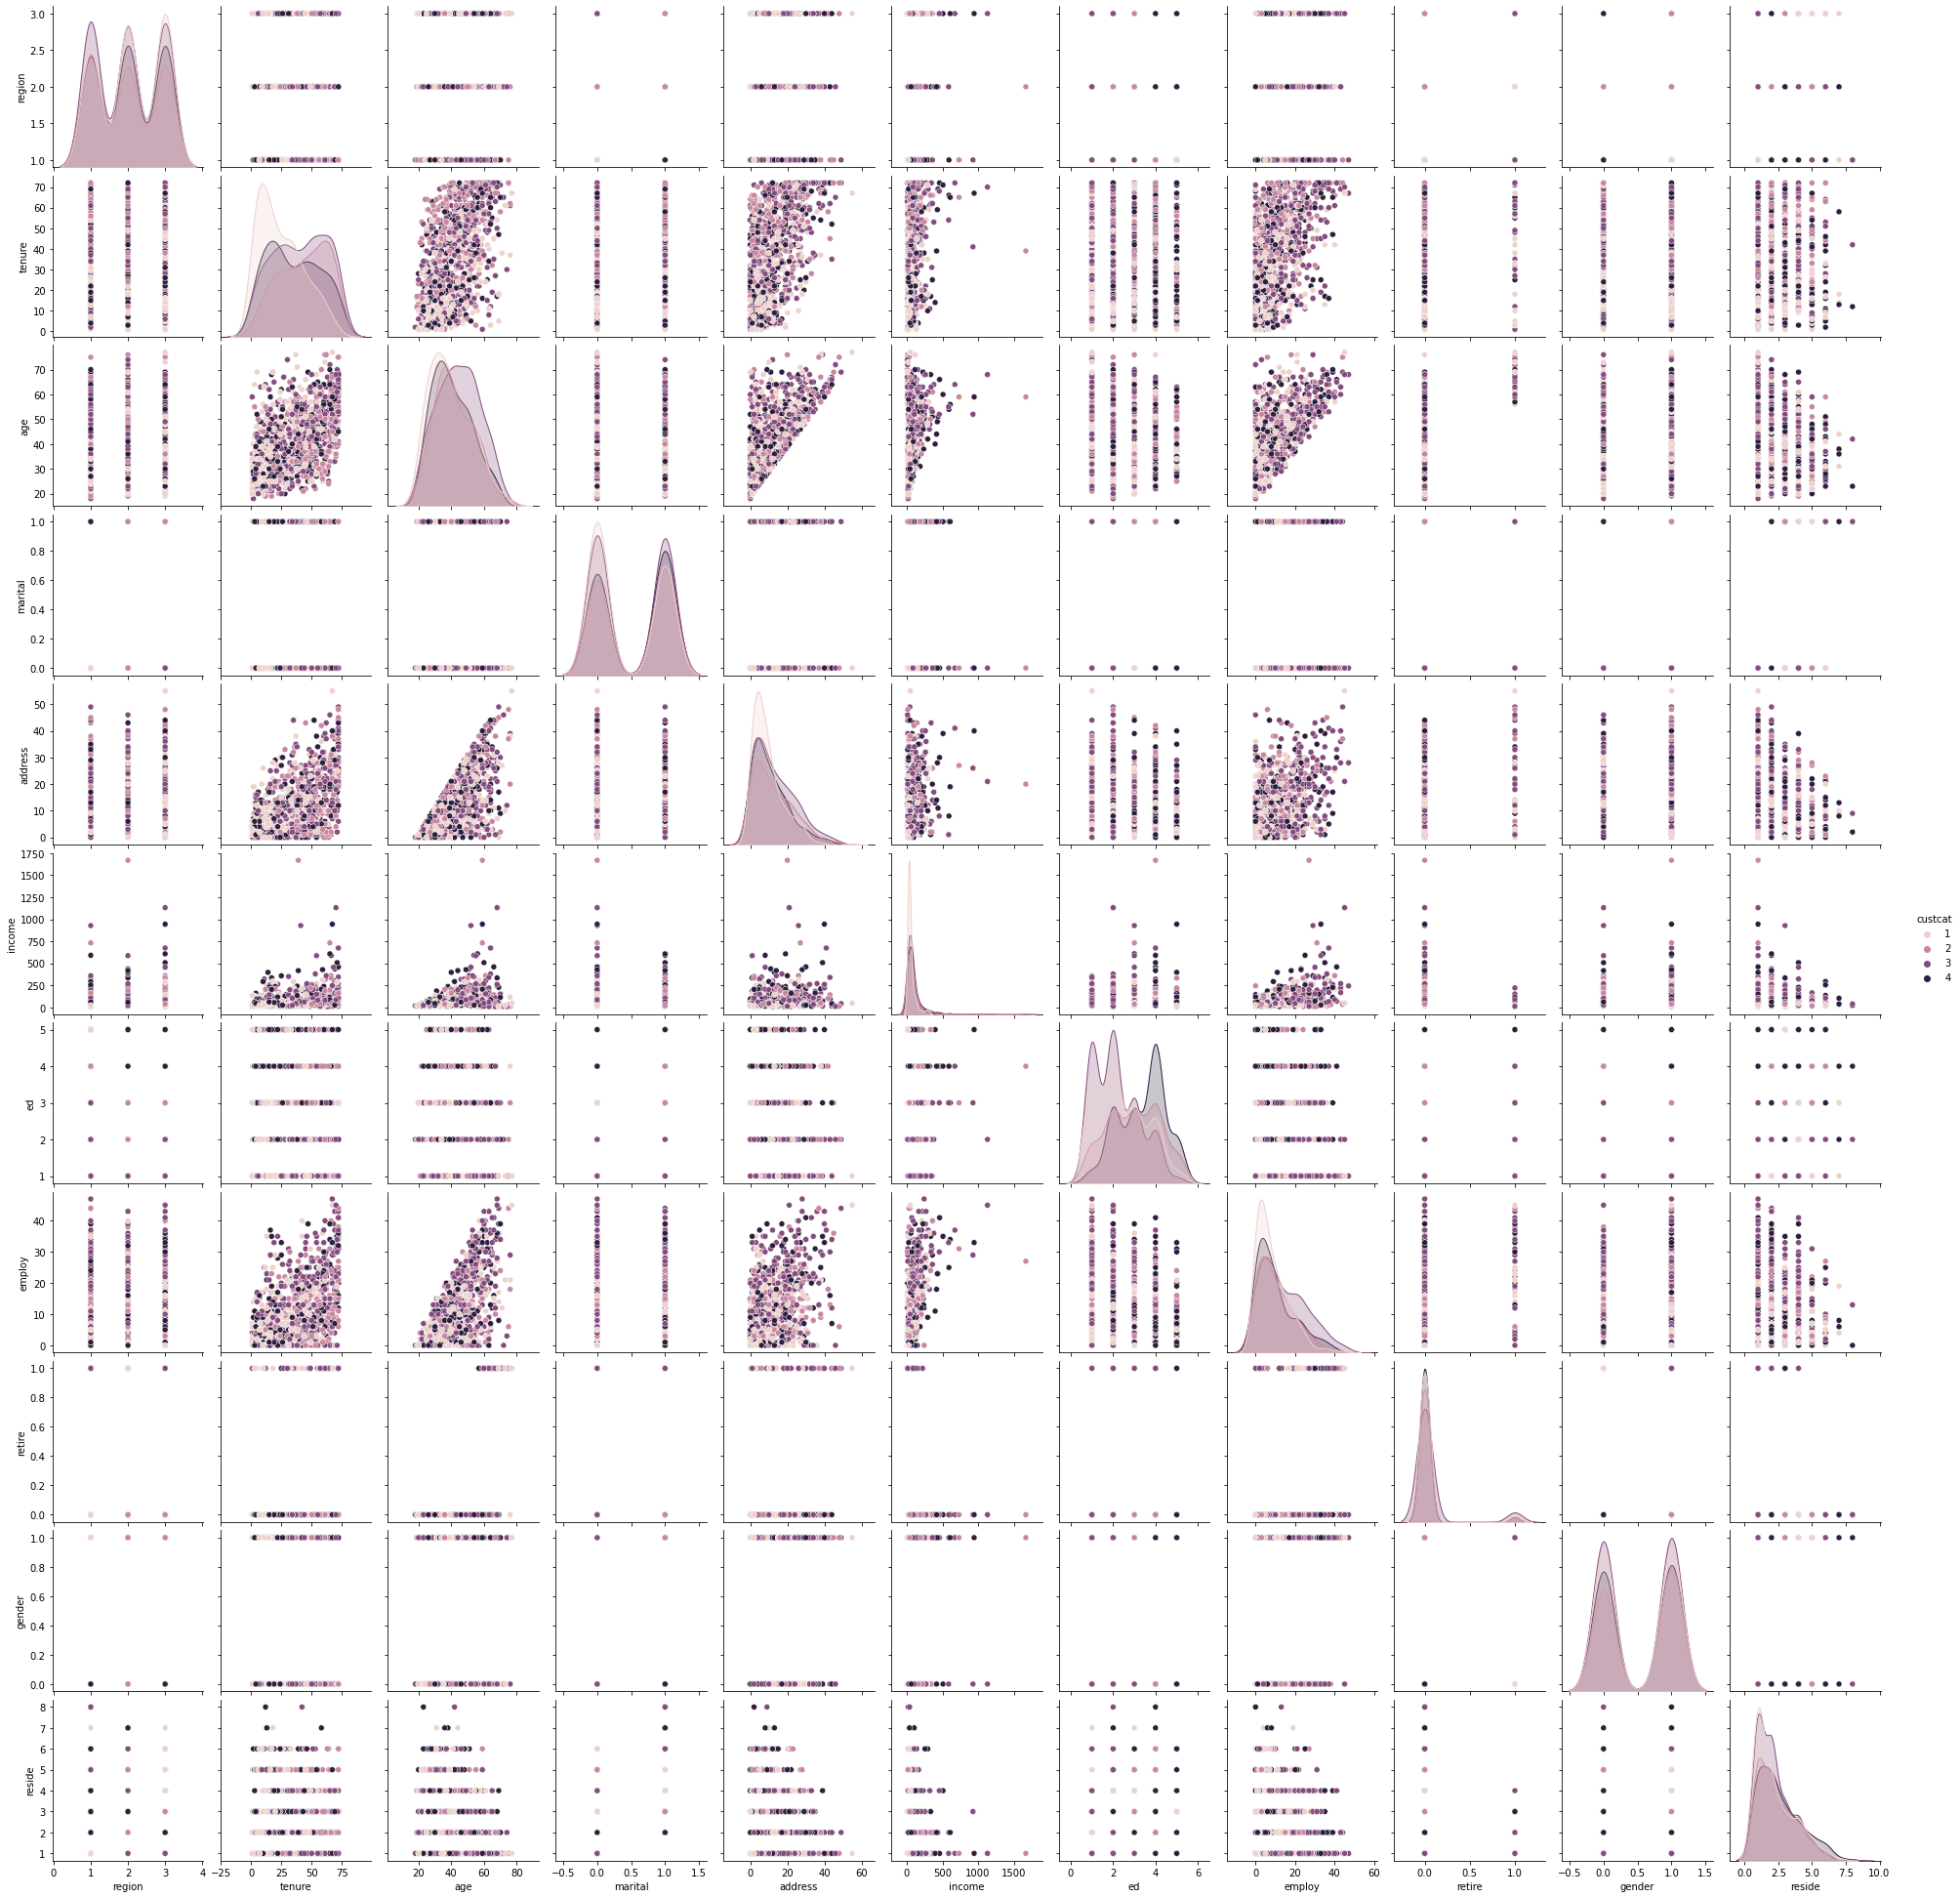

In [28]:
sb.pairplot(data=Tele,hue='custcat')
plt.show()

# X variables

In [31]:
X = Tele[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:10]

array([[  2,  13,  44,   1,   9,  64,   4,   5,   0,   0,   2],
       [  3,  11,  33,   1,   7, 136,   5,   5,   0,   0,   6],
       [  3,  68,  52,   1,  24, 116,   1,  29,   0,   1,   2],
       [  2,  33,  33,   0,  12,  33,   2,   0,   0,   1,   1],
       [  2,  23,  30,   1,   9,  30,   1,   2,   0,   0,   4],
       [  2,  41,  39,   0,  17,  78,   2,  16,   0,   1,   1],
       [  3,  45,  22,   1,   2,  19,   2,   4,   0,   1,   5],
       [  2,  38,  35,   0,   5,  76,   2,  10,   0,   0,   3],
       [  3,  45,  59,   1,   7, 166,   4,  31,   0,   0,   5],
       [  1,  68,  41,   1,  21,  72,   1,  22,   0,   0,   3]],
      dtype=int64)

# Y variables

In [33]:
y = Tele['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2], dtype=int64)

# Normalization of data

In [34]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577],
       [-0.02696767,  0.2564039 , -0.21382135, -0.9900495 ,  0.54048764,
         0.00434618, -0.54919639,  0.49746728, -0.22207644,  0.96655883,
        -0.927

# Train and test data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Build a K nearest neighbor (KNN)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
# Training: Lets start the algorithm with k=4 for now:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [37]:
# Predicting
yhat = neigh.predict(X_test)
yhat[0:10]

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4], dtype=int64)

# Accuracy analysis

In [38]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


# Build a Knn model with various K value and Decide the best K value.

In [39]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

# Plot for different niighbours

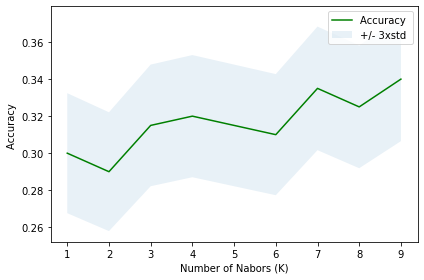

In [40]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


# End